# Estudo - Dados do Titanic

O famoso navio Titanic, que em sua viagem de inauguração em 14 de Abril de 1912, afundou após ter colidido com um iceberg, um navio grandioso e ousado para época e que seus construtores e projetistas o achavam indestrutivel.

### Informações obtidas

Nesse estudo, obtivemos o arquivo `titanic-data-6.csv`, com algumas informações de passageiros que embarcaram nessa viagem. 
Nela temos os seguintes dados :


 - _**Survived**_ - Indicação se o passgeiro sobreviveu ao acidente
 - _**PClass**_ - A qual classe do navio pertencia esse passageiro
 - _**Name**_ - Nome do passageiro
 - _**Sex**_ - Sexo do passageiro
 - _**Age**_ - Idade do passageiro
 - _**SibSp**_ - Número de parentes a bordo
 - _**Parch**_  - Número de pais/filhos a bordo
 - _**Ticket**_ - Número da passagem
 - _**Fare**_ - Tarifa paga
 - _**Cabine**_ - Cabine a qual o passageiro estava
 - _**Embarked**_ - Porto de embarque

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df = pd.read_csv("titanic-data-6.csv")

In [50]:
#Limpando os dados

# Prenchendo valores faltantes com a média, neste caso das idades
am = df['Age'].mean()
df['Age'].fillna(am,inplace=True)

#Ajustando cabines que estão nulas para N/I
df['Cabin'].fillna('N/I',inplace=True)

#Assumimos que embarques que não estejam marcados, aconteceram em Southampton
df['Embarked'].fillna('S',inplace=True)

In [51]:
"""
    Função que calcula Média

    INPUT:
    df: dataframe que será utilizada
    column: str. Nome da coluna que será realizada query
    result_col: str. Nome da coluna a qual a média será calculada
    parameter: str. Parâmetro que será utilizado na condição da query

    OUTPUT:
    Imprimi a média da coluna solicitada de acordo com o parametro informado
"""
def calcula_media(df, column, result_col, parameter):
    return round(df.query("{} == {}".format(column,parameter))[result_col].mean(),2)

### O que pretendo

Reponder algumas das perguntas abaixo, nas quais possam nos ajudar com alguns fatos interessantes sobre esse grande acontecimento.

In [52]:
idade_media_sobreviventes = calcula_media(df,"Survived","Age",1)
idade_media_nao_sobreviventes = calcula_media(df,"Survived","Age",0)

In [53]:
total_passageiros = df["PassengerId"].count()
sobreviventes = df.query("Survived == '1'")["PassengerId"].count()
nao_sobreviventes = df.query("Survived == '0'")["PassengerId"].count()
quantidade_mulheres = df.query("Sex == 'female'")["Sex"].count()
quantidade_homens = df.query("Sex == 'male'")["Sex"].count()


#### Perguntas que podemos responder

###### 1. Qual o total de passageiros desse estudo ?

In [23]:
 print("Para o estudo possuímos dados de {} passageiros".format(total_passageiros))

Para o estudo possuímos dados de 891 passageiros


###### 2. Qual a idade média dos passageiros ?

In [27]:
 print(round(df["Age"].mean(),2))

29.7


#### 3. Quais as quantidades de homens e mulheres? 

In [40]:
print("Respectivamente {} e {}".format(quantidade_homens,quantidade_mulheres))

Respectivamente 577 e 314


In [41]:
df_survivals = df.query("Survived == 1")

###### 4. Quantos foram os sobreviventes e os que faleceram no acidente ?

In [30]:
print("{} sobreviveram e {} não sobreviveram o acidente".format(sobreviventes,nao_sobreviventes))

342 sobreviveram e 549 não sobreviveram o acidente


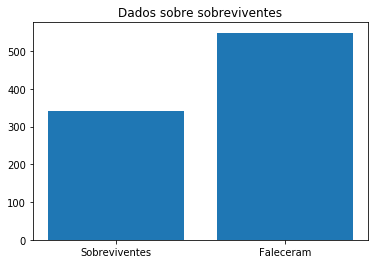

In [31]:
#Gráfico de barras
locations = [1, 2]
heights = [sobreviventes, nao_sobreviventes]
labels = ['Sobreviventes', 'Faleceram']
plt.bar(locations, heights, tick_label=labels)
plt.title('Dados sobre sobreviventes')
plt.show(block=True)

#### 5. Qual a idade média dos sobreviventes ?

In [33]:
print("A idade média dos sobreviventes é de {} e dos que faleceram é de {}".format(idade_media_sobreviventes,idade_media_nao_sobreviventes))

A idade média dos sobreviventes é de 28.34 e dos que faleceram é de 30.63


#### 6. Qual a quantidade de homens e mulheres que sobreviveram ao acidente ?

In [42]:
quantidade_sobreviventes_mulheres = df_survivals.query("Sex == 'female'")["Sex"].count()
quantidade_sobreviventes_homens = df_survivals.query("Sex == 'male'")["Sex"].count()

print("Respectivamente {} e {}".format(quantidade_sobreviventes_homens,quantidade_sobreviventes_mulheres))

Respectivamente 109 e 233


#### 7. Qual a quantidade de sobreviventes por classes ?

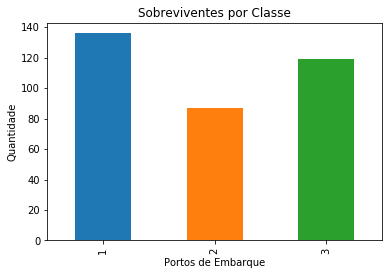

In [34]:

ax = df_survivals.groupby(['Pclass'])['Pclass'].count().plot(kind="bar", title="Sobreviventes por Classe");
ax.set(xlabel="Portos de Embarque", ylabel="Quantidade");

#### 8. Quais portos em que os sobreviventes entraram no navio ? 

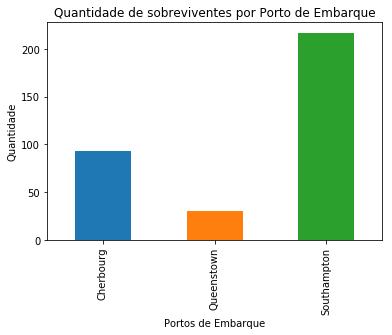

In [44]:
ax = df_survivals.replace('C','Cherbourg').replace('Q','Queenstown').replace('S','Southampton').groupby(['Embarked'])['Embarked'].count().plot(kind="bar",title="Quantidade de sobreviventes por Porto de Embarque");
ax.set(xlabel="Portos de Embarque", ylabel="Quantidade");

#### 9. Qual a média de tafira paga ?

In [43]:
print(round(df["Fare"].mean(),2))

32.2


#### 10. Qual a média de tafira paga entre os sobreviventes?

In [45]:
print(round(df_survivals["Fare"].mean(),2))

48.4


In [54]:
proporcao_mulheres_sobreviventes = quantidade_sobreviventes_mulheres / quantidade_mulheres
proporcao_homens_sobreviventes = quantidade_sobreviventes_homens / quantidade_homens

In [56]:
ind = np.arange(proporcao_mulheres_sobreviventes)  # a localização no eixo x dos grupos
width = 0.35       # a largura das barras

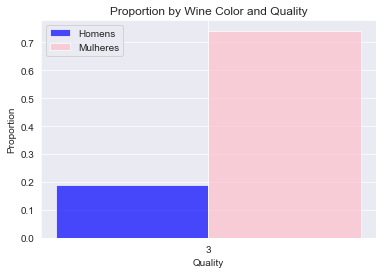

In [57]:
blue_bars = plt.bar(ind, proporcao_homens_sobreviventes, width, color='blue', alpha=.7, label='Homens')
pink_bars = plt.bar(ind + width, proporcao_mulheres_sobreviventes, width, color='pink', alpha=.7, label='Mulheres')

# título e rótulos
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ['3', '4', '5', '6', '7', '8', '9']  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels)

# legenda
plt.legend()